In [2]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt 

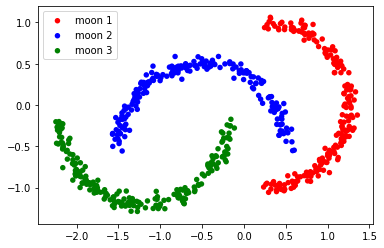

In [3]:
N = 200
t = np.random.rand(N) * np.pi
t.sort()

moon1 = np.column_stack((np.sin(t)+0.25, np.cos(t))) + 0.05 * np.random.randn(N,2)
moon2 = np.column_stack((np.cos(t), np.sin(t))) + 0.05 * np.random.randn(N,2) - 0.5
moon3 = np.column_stack((np.cos(t)-1.2, -np.sin(t)-0.2)) + 0.05 * np.random.randn(N,2)
moons = np.concatenate((moon1, moon2, moon3), 0)

m1 = plt.scatter(moon1[:,0], moon1[:,1], s=30, facecolors='r', edgecolors='none')
m2 = plt.scatter(moon2[:,0], moon2[:,1], s=30, facecolors='b', edgecolors='none')
m3 = plt.scatter(moon3[:,0], moon3[:,1], s=30, facecolors='g', edgecolors='none')
plt.legend((m1,m2,m3), ('moon 1', 'moon 2', 'moon 3'))
plt.show()

In [26]:
size = moons.shape[0] # size of the data

In [37]:
from sklearn.metrics import pairwise_distances
distances = pairwise_distances(moons, metric='euclidean',squared=True)
# distances is a symmtric matrix, by definition
# all elements in distances are already squared

In [38]:
# compute matrix P (this is actually ~P)
P = np.zeros((size, size))

# Denominator is the sum of many exponentials of the distances, except the diagonal terms
denominator = 0
for i in range(0, size):
    for j in range(0, size):
        if i != j:
            denominator += np.exp(-distances[i][j])

for i in range(0, size):
    for j in range(0, size):
        P[i][j] = np.exp(-distances[i][j]) / denominator

In [39]:
P

array([[1.09967568e-05, 1.09445862e-05, 1.09477298e-05, ...,
        7.93381411e-09, 5.58257204e-09, 4.96433865e-09],
       [1.09445862e-05, 1.09967568e-05, 1.09876161e-05, ...,
        8.61531092e-09, 5.93605653e-09, 5.38866896e-09],
       [1.09477298e-05, 1.09876161e-05, 1.09967568e-05, ...,
        9.85783400e-09, 6.84592672e-09, 6.19651150e-09],
       ...,
       [7.93381411e-09, 8.61531092e-09, 9.85783400e-09, ...,
        1.09967568e-05, 1.06422245e-05, 1.09102200e-05],
       [5.58257204e-09, 5.93605653e-09, 6.84592672e-09, ...,
        1.06422245e-05, 1.09967568e-05, 1.07527526e-05],
       [4.96433865e-09, 5.38866896e-09, 6.19651150e-09, ...,
        1.09102200e-05, 1.07527526e-05, 1.09967568e-05]])

In [21]:
def KL_divergence(params, P, n_samples, n_features):
    # params are y, need to learn
    # P is matrix P
    # n_samples, number of rows of the matrix data
    # n_features, number of columns of the matrix data
    
    Y = params.reshape(n_samples, n_components)
    
    distances = pairwise_distances(Y, metric='euclidean',squared=True) # NOTICE: distances are already squared
    Q = np.zeros((n_samples, n_samples))
    
    denominator = 0 # the denominator of all elements of Q
    for i in range(0, n_samples):
        for j in range(0, n_samples):
            if i != j:
                denominator += 1/(1+distances[i][j])

    for i in range(0, n_samples):
        for j in range(0, n_samples):
            Q[i][j] = 1/(1+distances[i][j]) / denominator
    
    
    kl_div = 0
    for i in range(0, n_samples):
        for j in range(0, n_samples):
            kl_div += P[i][j] * np.log(P[i][j]/Q[i][j])
    
    # gradient
    grad = np.zeros(n_samples)
    
    for i in range(0, n_samples):
        # calculate grad[i]
        for j in range(0, n_samples):
            
        grad[i]

array([[0.00000000e+00, 4.75547667e-03, 4.46828948e-03, ...,
        7.23422178e+00, 7.58570607e+00, 7.70307559e+00],
       [4.75547667e-03, 0.00000000e+00, 8.31563889e-04, ...,
        7.15181471e+00, 7.52431065e+00, 7.62105727e+00],
       [4.46828948e-03, 8.31563889e-04, 0.00000000e+00, ...,
        7.01708921e+00, 7.38170184e+00, 7.48136920e+00],
       ...,
       [7.23422178e+00, 7.15181471e+00, 7.01708921e+00, ...,
        0.00000000e+00, 3.27708655e-02, 7.90043464e-03],
       [7.58570607e+00, 7.52431065e+00, 7.38170184e+00, ...,
        3.27708655e-02, 0.00000000e+00, 2.24386144e-02],
       [7.70307559e+00, 7.62105727e+00, 7.48136920e+00, ...,
        7.90043464e-03, 2.24386144e-02, 0.00000000e+00]])

In [22]:
test = [[0,0],[10,0]]

In [23]:
distances = pairwise_distances(test, metric='euclidean',squared=True)

In [24]:
distances

array([[  0., 100.],
       [100.,   0.]])

In [34]:
p=0
p+=2
p+=3

In [4]:
moons[1]

array([0.31887225, 1.04918111])

In [42]:
np.dot(P,P).shape

(600, 600)